# Image Display with Firefly

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
Contact author: Jeff Carlin<br>
Last verified to run: 2024-12-17 <br>
LSST Science Pipelines version: Weekly 2024_50 <br>
Container Size: medium <br>
Targeted learning level: beginner <br>

**Description:** This tutorial demonstrates the Firefly interactive interface for image data.

**Skills:** Using Firefly as the display interface; visualizing images and their masks; overlaying sources on images.

**LSST Data Products:** DP0.2 collection: '2.2i/runs/DP0.2'. Dataset types: 'calexp,' 'src,' 'deepCoadd_calexp,' 'deepCoadd_forced_src,' 'deepCoadd_ref.'

**Packages:** lsst.afw.display, lsst.daf.butler 

**Credit:** This tutorial is based in part on the `Firefly.ipynb` notebook that is available under your home directory, in `notebooks/system-test`.

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0.lsst.io">dp0.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

This notebook is a counterpart to DP0.2 tutorial notebook 03a on image display and manipulation, and is intended to demonstrate the [Firefly](https://pipelines.lsst.io/v/daily/modules/lsst.display.firefly/index.html) interactive interface for viewing image data. As in the complementary "Image display" notebook, we will use the Butler to access images. We will also use the `lsst.afw.display` library to display images, but in this case with a different "back end" -- the interactive Firefly display tool.

### 1.1. Package imports

First, load the `lsst.afw.display` library to gain access to the image visualization routines we'd like to use, and the `lsst.daf.butler` library, which is used to access data products.

In [ ]:
import lsst.afw.display as afwDisplay
from lsst.daf.butler import Butler

## 2. Load the data to visualize

To display an image, we must first load some data. These data have been processed with the LSST Science Pipelines, and are organized in a structure that enables us to access them through the `Butler`. For more information on the `Butler`, see [lsst.daf.butler](https://pipelines.lsst.io/modules/lsst.daf.butler/index.html).

The DP0.2 data set contains simulated images from the LSST DESC Data Challenge 2 (DC2). These data are available in an S3 bucket called `dp02`. We access a single image from a specific visit (`192350`) and detector (`175`). This visit was obtained with the _i_-band filter; although `'band': 'i'` could be added to the `dataId` in the cell below, it would be redundant because the combination of visit and detector already uniquely identifies the exposure.

Once we define a string that contains the data directory, we start the `Butler` instance using the `lsst.daf.butler` library and its `Butler` class. The `Butler` object is initialized with a string containing the data directory we wish to access. Running the cell may take a few moments.

With the `Butler` instance now generated using our data directory, we can retrieve the desired calibrated exposure by telling the Butler which filter ("band"), CCD ("detector"), and visit we wish to view. To do this, define a dictionary with the required information.

In [ ]:
dataId = {'visit': 192350, 'detector': 175}
butler = Butler('dp02', collections='2.2i/runs/DP0.2')
calexp = butler.get('calexp', **dataId)

## 3. Display a calexp image

To display the `calexp` you will use the LSST `afwDisplay` framework. It provides a uniform API for multiple display backends, including DS9, matplotlib, and LSST’s Firefly viewer. The default backend is `ds9`, but since we are working remotely on `JupyterLab` we would prefer to use the web-based Firefly display. A [user guide](https://pipelines.lsst.io/v/daily/modules/lsst.display.firefly/index.html)  for `lsst.display.firefly` is available on the [pipelines.lsst.io](https://pipelines.lsst.io/v/daily) site.

### 3.1. Create a display

Now, create a Firefly display.

> **Notice:** If the following cell does not cause the Firefly display to open in a new tab within the Notebook Aspect, try going to "Kernel" --> "Restart Kernel and Clear All Outputs...", and then re-running all of the cells and the cell below. If that does not work, shut down this notebook and fully log out of the RSP, and log back in again. Ensure you are using the recommended image for the Notebook Aspect and at least a medium container size. If the Firefly display still does not open, please submit a <a href="https://github.com/rubin-dp0/Support">GitHub Issue</a>.

In [ ]:
afwDisplay.setDefaultBackend('firefly')
afw_display = afwDisplay.Display(frame=1)

In the Science Platform Notebook aspect, a Firefly viewer tab appears.

Click on the tab above that says "Firefly: slateClient..." and drag it down to the middle-right part of the JupyterLab area to create two side by side panes, one with the notebook and one with the Firefly image display.

### 3.2. Display the calexp (calibrated exposure)

We can now build the display and use the `mtv` method to view the `calexp` with Firefly. First display an image with mask planes and then overplot some sources.

In [ ]:
afw_display.mtv(calexp)

As soon as you execute the command a single calibrated DC2 exposure for the `{'band': 'i', 'detector': 175, 'visit': 192350}` data ID should appear in the Firefly `JupyterLab` tab.

Notice that the image is overlaid with colorful regions. These are mask regions. Each color reflects a different mask bit that corresponds to detections and different types of detector artifacts. You’ll learn how to interpret these colors later, but first you’ll likely want to adjust the image display.

### 3.3. Improving the image display

The display framework gives you control over the image display to help bring out image details. 
The default is for masked regions to be semi-transparent, so that underlying image features are visible.
The setMaskTransparency method’s argument can range from 0 (fully opaque) to 100 (fully transparent).

See the difference when mask trasparency is set to 20% (mostly opaque):

In [ ]:
afw_display.setMaskTransparency(20)

And now set it back to 80% (mostly transparent):

In [ ]:
afw_display.setMaskTransparency(80)

You can also control the colorbar scaling algorithm with the display’s scale method. Try an asinh stretch with explicit minimum (black) and maximum (white) values:

In [ ]:
afw_display.scale("asinh", -5, 20)

You can also use an automatic algorithm like `zscale` (or `minmax`) to select the white and black thresholds:

In [ ]:
afw_display.scale("asinh", "zscale")

### 3.4. Interpreting displayed mask colors

The display framework renders each plane of the mask in a different color (plane being a different bit in the mask). To interpret these colors you can get a dictionary of mask planes from the `calexp` and query the display for the colors it rendered each mask plane with. For example:

In [ ]:
mask = calexp.getMask()
for maskName, maskBit in mask.getMaskPlaneDict().items():
    print('{}: {}'.format(maskName, afw_display.getMaskPlaneColor(maskName)))

#### 3.4.1. Find mask names and colors in the Firefly interactive panel

In the Firefly viewer tab, at upper right, there are several icon buttons.
Hover over each icon to see pop-up text describing the button's functionality.

Click on the button for "Manipulate overlay display...".
A "Layers" pop-up window will appear that contains the mask name and its color.

### 3.5 Adjusting displayed masked colors

There are times when one might wish to adjust the displayed masked colors -- e.g., to highlight one or more masks more prominently, or to make make the mask colors more color-blind friendly.  Here we will look at two different methods for adjusting the displayed masked colors:  using `lsst.afw.display` commands from within the notebook, and using the interactive panel within the firefly display.  We will consider each of these in turn.

#### 3.5.1 Using `lsst.afw.display` commands

Let us start out using `lsst.afw.display` commands within the notebook itself.

First, let us save the original mask plane colors to a python dictionary so we can easily reset them to their defaults later, after working with them.

In [ ]:
origMaskPlaneColorsDict = {}
for maskName, maskBit in mask.getMaskPlaneDict().items():
    origMaskPlaneColorsDict[maskName] = afw_display.getMaskPlaneColor(maskName)

print(origMaskPlaneColorsDict)

There are only a handful of basic colors used as default colors for the different mask planes, and some are used multiple times.  Some of these mask planes are not often used and they might not all appear for a given image in the Firefly display.

With `lsst.afw.display`, there are many options for colors.  For example, one can use any of the X11 color names, which are listed here:  https://en.wikipedia.org/wiki/X11_color_names.

For example, change the color of the `NOT_DEBLENDED` mask plane to purple:

In [ ]:
afw_display.setMaskPlaneColor('NOT_DEBLENDED','purple')

The change won't actually appear in the Firefly display until you rerun the `mtv` command:

In [ ]:
afw_display.mtv(calexp)

One can also use hex designations for colors, e.g., this color-blind-friendly set from https://gist.github.com/thriveth/8560036 :

In [ ]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Let's reset these 7 commonly used masked planes to the first 7 of the above color-blind-friendly set of colors:

In [ ]:
afw_display.setMaskPlaneColor('CR',CB_color_cycle[0])
afw_display.setMaskPlaneColor('CROSSTALK',CB_color_cycle[1])
afw_display.setMaskPlaneColor('DETECTED',CB_color_cycle[2])
afw_display.setMaskPlaneColor('EDGE',CB_color_cycle[3])
afw_display.setMaskPlaneColor('INTRP',CB_color_cycle[4])
afw_display.setMaskPlaneColor('NOT_DEBLENDED',CB_color_cycle[5])
afw_display.setMaskPlaneColor('SAT',CB_color_cycle[6])

Then rerun the mtv command to see the updated mask colors:

In [ ]:
afw_display.mtv(calexp)

Now, let's reset all of the masked planes to their original displayed colors:

In [ ]:
for key in origMaskPlaneColorsDict:
    print(key, origMaskPlaneColorsDict[key])
    afw_display.setMaskPlaneColor(key,origMaskPlaneColorsDict[key])

And rerun the mtv command to see that the mask planes have indeed reverted to their original displayed colors:

In [ ]:
afw_display.mtv(calexp)

Finally, one can also effectively turn given masks "off" in the Firefly display by setting their transparency to 100:

In [ ]:
afw_display.setMaskTransparency(100, 'NOT_DEBLENDED')

And then reset it to something more opaque:

In [ ]:
afw_display.setMaskTransparency(40, 'NOT_DEBLENDED')

#### 3.5.2 Using the Firefly interactive panel

Click on the button for "Manipulate overlay display...".
The "Layers" pop-up window provides more detailed control over the mask planes.

Turn individual planes on and off by clicking the toggles at left.

Change the color and transparency by clicking on the color square, and selecting a new color or using the transparency slider bar in the "Color Picker" pop-up window.

Delete a mask layer by clicking on the X at right.

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

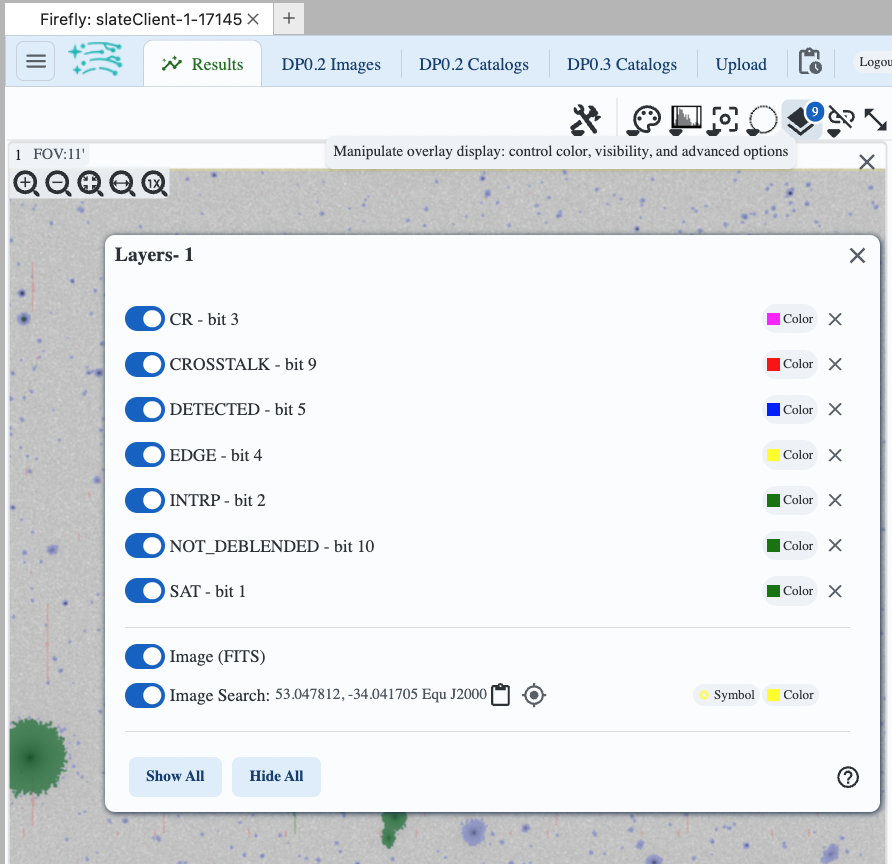

</div>

> **Notice:** Modifications to the displayed masked colors made via `lsst.afw.display` commands will be mirrored in the Firefly overlay display panel.
However, changes performed in the Firefly overlay display panel might not be mirrored in the `lsst.afw.display` variables.

For example, changing the color of the `DETECTED` mask layer to purple via `afw_display.setMaskPlaneColor('DETECTED','purple')` will appear in the graphical panel).
But changing the `DETECTED` mask layer to purple in the graphical panel does not cause `afw_display.getMaskPlaneColor('DETECTED')`  in the notebook tab to also yield a value of 'purple'.

### 3.6. Plotting sources on the display

The measurements for all sources detected in the `calexp` image by the LSST science pipelines are in a dataset type `src`. Use the Butler to get the `src` catalog corresponding to the same `dataId` as the image we displayed:

In [ ]:
src = butler.get('src', **dataId)

The returned object, `src`, is a `lsst.afw.table.SourceTable` object. `SourceTables` are explored more elsewhere, but you can do some simple investigations using common python functions. For example, check the length of the object:




In [ ]:
len(src)

View an HTML rendering of the `src` table by getting an `astropy.table.Table` version of it:

In [ ]:
src.asAstropy()

Now overplot sources from the `src` table onto the image display using the Display’s `dot` method for plotting markers. `Display.dot` plots markers individually, so you’ll need to iterate over rows in the `SourceTable`.  It is more efficient to send a batch of updates to the display, so enclose the loop in a `display.Buffering` context, like this:

In [ ]:
with afw_display.Buffering():
    for record in src:
        afw_display.dot('o', record.getX(), record.getY(), size=20, ctype='orange')

### 3.7. Clearing markers

`Display.dot` always adds new markers to the display. To clear the display of all markers, use the erase method:

In [ ]:
afw_display.erase()

## 4. Display a coadd image

"Coadds" are the images made by combining multiple overlapping `calexp`s to create a deeper image. Let's look at one of them (in fact, the same coadd that was examined in the related "Image Display" notebook). The Butler dataset type is called a `deepCoadd_calexp`.

In [ ]:
dataId_coadd = {'tract': 4431, 'patch': 17, 'band': 'i'}
coadd_calexp = butler.get('deepCoadd_calexp', **dataId_coadd)

We will also grab the measurements for sources in this coadd (called `deepCoadd_forced_src` because it is "forced" photometry at the positions of all detected objects), and the "reference table" that contains merged information about all detected objects from all filters.

In [ ]:
forced_src = butler.get('deepCoadd_forced_src', **dataId_coadd)
refTable = butler.get('deepCoadd_ref', **dataId_coadd)

In [ ]:
afw_display.mtv(coadd_calexp)

That includes a lot of mask information! 
Use the layers functionality in the Firefly window to turn off "INEXACT_PSF", "REJECTED", and "SENSOR_EDGE" to reclaim your view of most of the pixel data.

Optionally, set the transparency of all mask layers to 100\%.

In [ ]:
afw_display.setMaskTransparency(100)

### 4.1. Plotting sources on the displayed coadd

As we did for the `calexp`, let's display sources on top of the `deepCoadd_calexp` image. We will apply three selection criteria:

1. Spatially select objects that are near the bottom left corner of the image (at X<1000 and Y<1000, where X and Y are the pixel values. (This is just so that the overplotting will go faster.)

2. Use the `detect_isPrimary` flag to select non-duplicate objects that have been deblended (see [this section of the pipelines tutorial](https://pipelines.lsst.io/getting-started/multiband-analysis.html#the-go-to-flag-detect-isprimary) for details).

3. Use one of the flags from the reference table that tells you whether a source was measured to be "extended" (like a galaxy). The `base_ClassificationExtendedness_value` is set to 1 for extended sources (galaxies) and 0 for point sources (stars). Again, see the tutorial section linked above for more about this flag and an example of its usage.

Note that if you want to see all of the columns in the `forced_src` or `refTable` catalogs, you can use the method "forced_src.schema" or "refTable.schema".

> **Notice:** Because a "patch" is part of a larger "tract", the (X, Y) coordinates of the lower-left corner are not (0, 0). We need to get the coordinates of that corner and subtract them off, which is what the first few lines of the next code cell does.

In [ ]:
xy0 = coadd_calexp.getXY0()
xPos = refTable["base_SdssCentroid_x"] - xy0.getX()
yPos = refTable["base_SdssCentroid_y"] - xy0.getY()

boxSelect = (xPos < 1000) & (yPos < 1000)

isPrimary = refTable['detect_isPrimary']

isStellar = refTable['base_ClassificationExtendedness_value'] < 1.

Display stars in the lower-left corner with orange circles.

In [ ]:
with afw_display.Buffering():
    for record in forced_src[boxSelect & isPrimary & isStellar]:
        afw_display.dot('o', record.getX(), record.getY(), size=20, ctype='orange')

Display galaxies in the lower-left corner (really, just anything that is "extended") with blue circles

In [ ]:
with afw_display.Buffering():
    for record in forced_src[boxSelect & isPrimary & ~isStellar]:
        afw_display.dot('o', record.getX(), record.getY(), size=20, ctype='blue')

Use the magnifying glass icon to zoom in on the lower-left corner where the objects are marked, and inspect the image. 
Use the color palate and histogram icons to change the color bar and pixel scaling to examine faint sources within circles that appear empty.

## 5. Exercises for the learner

This tutorial was a basic introduction to displaying and manipulating images with Firefly.

1. Change the colors of the mask plane, or the flux scaling of the image display.
2. Explore a different deepCoadd (e.g., the galaxy cluster used in the introductory notebook).
3. Identify different source populations to overplot (e.g., faintest stars, inclined galaxies).

Enjoy exploring the DP0 images and catalogs!

### 5.1. Review additional documentation

If you would like more information on `lsst.afw.display`, please have a look at the following websites:

* [Firefly user guide](https://pipelines.lsst.io/v/daily/modules/lsst.display.firefly/index.html)
* [Getting Started on Image Display (pipelines.lsst.io)](https://pipelines.lsst.io/getting-started/display.html)

* [afw.display Doxygen website](http://doxygen.lsst.codes/stack/doxygen/x_masterDoxyDoc/namespacelsst_1_1afw_1_1display.html)  
* [afw.display GitHub website](https://github.com/lsst/afw/tree/master/python/lsst/afw/display)  
